In [1]:
import pandas as pd
    

In [2]:
data = pd.read_csv('SMSSpamCollection',sep = '\t')
data.columns = ['label','body_text']

In [3]:
#create feature text message length

In [4]:
data['body_len'] = data['body_text'].apply(lambda x:len(x) - x.count(" "))

In [5]:
data.head()

,label,body_text,body_len
0,ham,Ok lar... Joking wif u oni...,24
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,U dun say so early hor... U c already then say...,39
3,ham,"Nah I don't think he goes to usf, he lives aro...",49
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116


In [6]:
#create feature for percent of text that is punctuation


In [7]:
import string

In [8]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4
3,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116,6.9


In [9]:
#evaluate created features

In [10]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


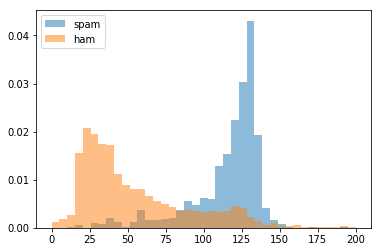

In [19]:
bins = np.linspace(0,200,40)
#build histo for body len, filter, label = spam
pyplot.hist(data[data['label']=='spam']['body_len'],bins,alpha = 0.5,normed = True,label= 'spam')
#alpha - how dark the shade of hist
#normed - normalise plots to same scale, bcoz more ham than spam
pyplot.hist(data[data['label']=='ham']['body_len'],bins,alpha = 0.5,normed = True,label = 'ham')

pyplot.legend(loc = 'upper left')
pyplot.show()

In [20]:
#our hypothesis that spam messages are normally longer 
#than ham messages is --- true

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


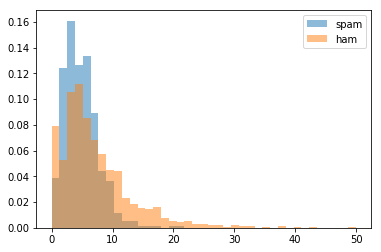

In [15]:
bins = np.linspace(0,50,40)

pyplot.hist(data[data['label']=='spam']['punct%'],bins,alpha = 0.5,normed = True,label= 'spam')
#alpha - how dark the shade of hist
#normed - normalise plots to same scale, bcoz more ham than spam
pyplot.hist(data[data['label']=='ham']['punct%'],bins,alpha = 0.5,normed = True,label = 'ham')

pyplot.legend(loc = 'upper right')
pyplot.show()

In [23]:
#our hypothesis that spam messages have more punctuations
#than ham messages is ---- false

In [22]:
#feature transformations

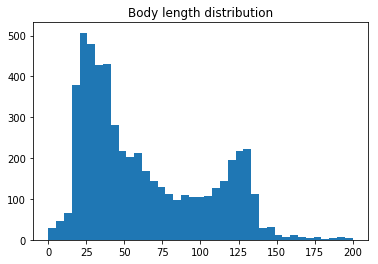

In [24]:
bins= np.linspace(0,200,40)

pyplot.hist(data['body_len'],bins)
pyplot.title("Body length distribution")
pyplot.show()

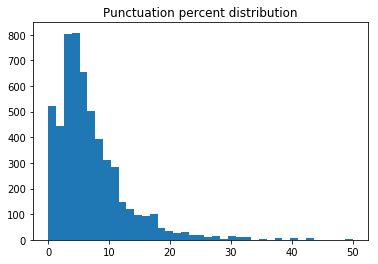

In [25]:
bins= np.linspace(0,50,40)

pyplot.hist(data['punct%'],bins)
pyplot.title("Punctuation percent distribution")
pyplot.show()

In [26]:
#this feature is skewed, so we'll transform it

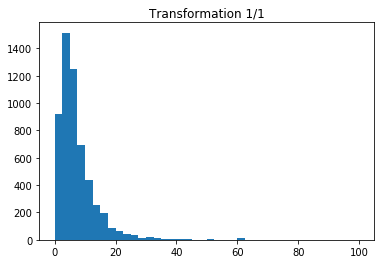

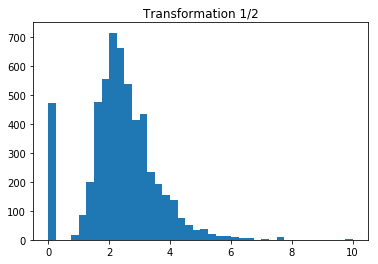

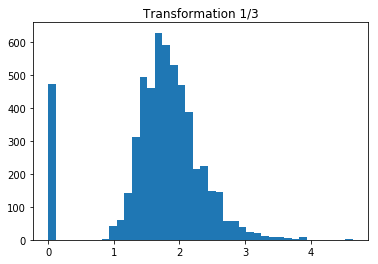

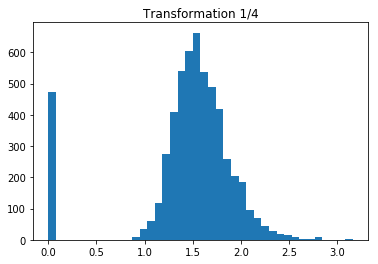

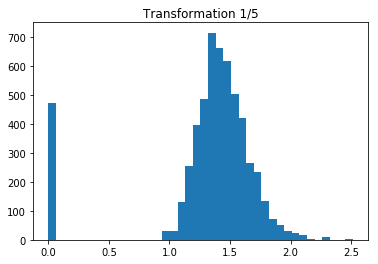

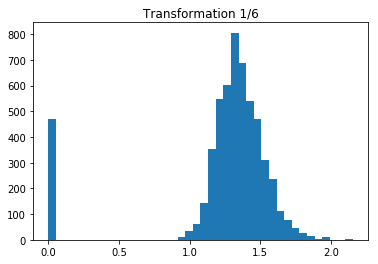

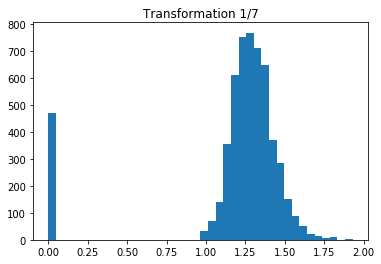

In [32]:
for i in [1,2,3,4,5,6,7]:
    pyplot.hist((data['punct%'])**(1/i),bins = 40);
    pyplot.title('Transformation 1/{}'.format(str(i)))
    pyplot.show()